# ** Ciência dos Dados - Trabalho**

**Idh, Democracia e Assassinatos por 100 mil**

Utilizando os dados de Idh, nível de democracia e assassinatos relativos, deseja-se descobrir **Como índice de democracia de um país influencia o seu Idh e seu número relativo de assassinatos**

Primeiro fazemos as importações das bibliotecas pandas e matplotlib.

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Depois, temos que colocar os arquivos de excel em dataframes.

In [132]:
idh=pd.read_excel('IDH.xlsx')
ass=pd.read_excel('Assassinatos.xlsx')
dem=pd.read_excel('Democracia.xlsx')

idh.head()

,IDH,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


Assim que criamos os dataframes, precisamos escolher um ano para analisar os dados. O ano de 2005 é uma boa escolha, já que é um
ano recente e que tem a maioria dos dados das três tabelas.

In [133]:
idh_2005 = idh.loc[:,['IDH',2005]]
ass_2005 = ass.loc[:,['Assassinatos',2005]]
dem_2005 = dem.loc[:,['Democracia',2005]]

idh_2005.head()

,IDH,2005
0,Afghanistan,0.405
1,Albania,0.696
2,Algeria,0.686
3,Andorra,NaN
4,Angola,0.439


Já escolhido o ano, precisa-se excluir os índices numéricos a esquerda das três tabelas.

In [134]:
idh_idx=idh_2005.set_index('IDH')
ass_idx=ass_2005.set_index('Assassinatos')
dem_idx=dem_2005.set_index('Democracia')


idh_idx.head()

,2005
IDH,
Afghanistan,0.405
Albania,0.696
Algeria,0.686
Andorra,NaN
Angola,0.439


Após isso, precisamos excluir de nossa análise os países sem dados.

In [135]:
idh_nan=idh_idx.dropna(axis=0)
ass_nan=ass_idx.dropna(axis=0)
dem_nan=dem_idx.dropna(axis=0)

idh_nan.head()

,2005
IDH,
Afghanistan,0.405
Albania,0.696
Algeria,0.686
Angola,0.439
Antigua and Barbuda,0.773


Depois precisamos juntar os três dataframes.

In [136]:
ia = idh_nan.join(ass_nan, how='inner', lsuffix='_IDH', rsuffix='_Assassinatos')
ia.head()

,2005_IDH,2005_Assassinatos
Afghanistan,0.405,3.84
Albania,0.696,7.33
Algeria,0.686,4.39
Angola,0.439,48.20
Antigua and Barbuda,0.773,7.49


In [137]:
iad=ia.join(dem_nan, how='inner')

iad.head()


,2005_IDH,2005_Assassinatos,2005
Albania,0.696,7.33,9.0
Algeria,0.686,4.39,2.0
Angola,0.439,48.20,-2.0
Argentina,0.782,5.25,8.0
Armenia,0.692,2.35,5.0


Por fim, a função 'join', apenas pode juntar duas colunas para definir seus sufixos; então, para definir corretamente o nome das
colunas, devemos utilizar 'columns'.

In [138]:
iad.columns=['2005_IDH','2005_Assassinatos','2005_Democracia']

iad.head()

,2005_IDH,2005_Assassinatos,2005_Democracia
Albania,0.696,7.33,9.0
Algeria,0.686,4.39,2.0
Angola,0.439,48.20,-2.0
Argentina,0.782,5.25,8.0
Armenia,0.692,2.35,5.0


democracia plena(10)
democracia (6-9)
Anocracia(1-5)
Anocracia fechada(-5-0)
#autocracia(-10-60)

Agora temos que substituir os números da variável qualitativa '2005_Democracia' pelos seguintes dados de correlação encontrados no site https://www.systemicpeace.org/polity/polity4.htm:

Full Democracy..........(10)
Democracy..............(6,9)
Anocracy...............(1,5)
Closed Anocracy.......(-5,0)
Autocracy...........(-10,-6)

Para fazer essa substituição, criamos uma função 'classificacao', que vai fazer esse processo.

In [139]:
def classificacao(x):
    if x==10:
        return 'Full Democracy'
    elif x>=6:
        return 'Democracy'
    elif x>=1:
        return 'Anocracy'
    elif x>=(-5):
        return 'Closed Anocracy'
    else:
        return 'Autocracy'

In [140]:
dem_cla=iad['2005_Democracia'].apply(classificacao)

dem_cla.head()

Albania            Democracy
Algeria             Anocracy
Angola       Closed Anocracy
Argentina          Democracy
Armenia             Anocracy
Name: 2005_Democracia, dtype: object

Depois de criarmos uma nova coluna, utilizando a função criada, temos que juntá-la no dataframe completo, utilizando novamente o 'join'.

In [141]:
new_iad=ia.join(dem_cla,how='inner')

new_iad.head()

,2005_IDH,2005_Assassinatos,2005_Democracia
Albania,0.696,7.33,Democracy
Algeria,0.686,4.39,Anocracy
Angola,0.439,48.20,Closed Anocracy
Argentina,0.782,5.25,Democracy
Armenia,0.692,2.35,Anocracy


Depois de juntarmos novamente o dataframe, devemos mudar a coluna '2005_Democracia' para ser lida como uma variável qualitativa, utilizando o método 'astype'

In [142]:
new_iad['2005_Democracia']=new_iad['2005_Democracia'].astype('category')

new_iad['2005_Democracia'].value_counts(True)*100

Democracy          37.179487
Full Democracy     21.153846
Closed Anocracy    16.666667
Autocracy          14.102564
Anocracy           10.897436
Name: 2005_Democracia, dtype: float64

Para poder gerar um gráfico que gere de maneira intuitiva os dados apresentados, utilizamos o 'plt.scatter', para gerar um gráfico em que a cor dos pontos varia de azul até vermelho, sendo mais democraticos os azuis e menos os vermelhos. A posição x dos pontos representa o número de assassinatos relativo e a posição y representa o IDH do país.

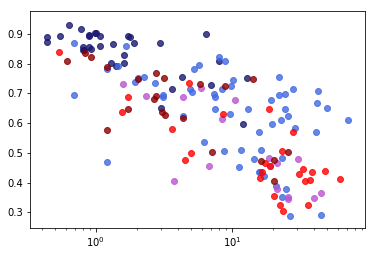

In [143]:
sistemas=['Full Democracy', 'Democracy', 'Anocracy', 'Closed Anocracy', 'Autocracy']

cores=['#191970','#4169E1','#BA55D3','red','#8B0000']

for r in range(5):
    dat=new_iad[new_iad['2005_Democracia']==sistemas[r]]
    cor=cores[r]
    plt.scatter(dat['2005_Assassinatos'],dat['2005_IDH'], c=cor, alpha=0.8)
    plt.xscale('log')


In [144]:
import math

def log(x):
    return math.log10(x)

In [145]:
ass_log=new_iad['2005_Assassinatos'].apply(log)

ass_log.head()

Albania      0.865104
Algeria      0.642465
Angola       1.683047
Argentina    0.720159
Armenia      0.371068
Name: 2005_Assassinatos, dtype: float64

In [146]:
ass_log.corr(new_iad['2005_IDH'])

-0.7485099077916744

In [147]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Ajuste linear:
Coeficiente linear: 0.8185764256307939
Coeficiente angular: -0.2216447229574449


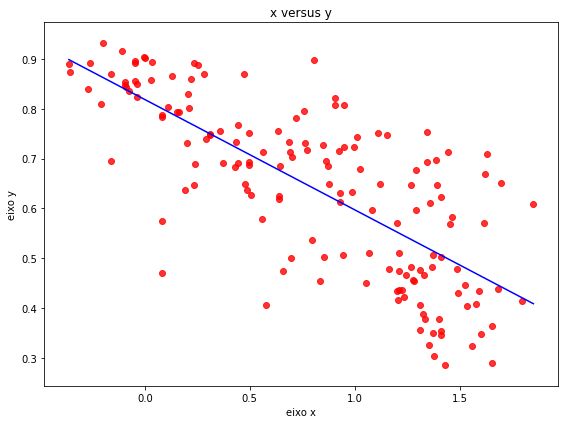

In [148]:
reta(ass_log,new_iad['2005_IDH'] )

In [149]:
medias={'Sistema':sistemas,'IDH':[]}


for r in range(5):
    fram=new_iad[new_iad['2005_Democracia']==sistemas[r]]
    med=fram['2005_IDH'].mean()
    
    medias['IDH'].append(med)
    

    
    
df = pd.DataFrame(data=medias)

df=df.set_index('Sistema')
df.head()



    

,IDH
Sistema,
Full Democracy,0.836485
Democracy,0.627603
Anocracy,0.508765
Closed Anocracy,0.494577
Autocracy,0.661773


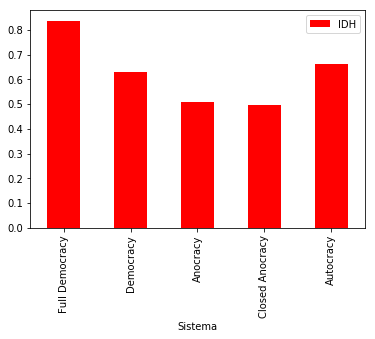

In [150]:
df.plot.bar(color=['red'])

In [151]:
list_columns=[0,7,8,9,10,11,12,13,14,15,16]

idh_10 = idh.iloc[:,[0,7,8,9,10,11,12,13,14,15,16]]
dem_10 = dem.iloc[:,[0,197,198,199,200,201,202,203,204,205,206]]

dem_10.head()

,Democracia,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,-7.0,-7.0,-7.0,-7.0,-7.0,NaN,NaN,NaN,NaN,NaN
1,Albania,0.0,5.0,5.0,5.0,5.0,5.0,7.0,7.0,7.0,9.0
2,Algeria,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,2.0,2.0
3,Angola,-2.0,-3.0,-3.0,-3.0,-3.0,-3.0,-2.0,-2.0,-2.0,-2.0
4,Argentina,7.0,7.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


In [152]:
idh_10n=idh_10.dropna()
dem_10n=dem_10.dropna()

idh_10n.head()

,IDH,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,0.328,0.332,0.335,0.338,0.340,0.341,0.373,0.381,0.396,0.405
1,Albania,0.637,0.636,0.646,0.656,0.662,0.670,0.674,0.681,0.685,0.696
2,Algeria,0.609,0.617,0.627,0.636,0.644,0.653,0.663,0.673,0.680,0.686
6,Argentina,0.738,0.746,0.753,0.764,0.771,0.776,0.770,0.775,0.780,0.782
7,Armenia,0.609,0.618,0.632,0.639,0.644,0.645,0.657,0.668,0.679,0.692


In [153]:
idh_10i=idh_10n.set_index('IDH')
dem_10i=dem_10n.set_index('Democracia')

idh_10i.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
IDH,,,,,,,,,,
Afghanistan,0.328,0.332,0.335,0.338,0.340,0.341,0.373,0.381,0.396,0.405
Albania,0.637,0.636,0.646,0.656,0.662,0.670,0.674,0.681,0.685,0.696
Algeria,0.609,0.617,0.627,0.636,0.644,0.653,0.663,0.673,0.680,0.686
Argentina,0.738,0.746,0.753,0.764,0.771,0.776,0.770,0.775,0.780,0.782
Armenia,0.609,0.618,0.632,0.639,0.644,0.645,0.657,0.668,0.679,0.692


In [154]:
for e in range(1996,2006):
    dem_10i[e]=dem_10i[e].apply(classificacao)

dem_10i.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
Democracia,,,,,,,,,,
Albania,Closed Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Democracy,Democracy,Democracy,Democracy
Algeria,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Anocracy,Anocracy
Angola,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy
Argentina,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy
Armenia,Autocracy,Autocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy


In [158]:
for e in range(1996,2006):
    dem_10i[e]=dem_10i[e].astype('category')
    
dem_10i[1996].value_counts()

Democracy          46
Autocracy          39
Full Democracy     29
Closed Anocracy    26
Anocracy           20
Name: 1996, dtype: int64

In [ ]:
di=idh_10i.join(dem_10i,how='inner',lsuffix='_idh',rsuffix='_democracia')

di.head()